# Hello ༼ つ ◕_◕ ༽つ
<Right><img src="https://media.giphy.com/media/STfDsIEgsOU3S/giphy.gif?cid=ecf05e47ze9ofv3ujfmngo1co5t89o8l3daktc2aa9f159jj&ep=v1_gifs_related&rid=giphy.gif&ct=g" width=600 height=400></Right>

## Chronicles of the Cryptocurrency Leader

Welcome to the "Chronicles of the Cryptocurrency Leader"! In this notebook, we will analyze Bitcoin prices, the influence of Elon's tweets on Bitcoin, and conduct various analysis and visualizations to gain insights into cryptocurrency trends.

## Table of Contents
1. Data Context
2. Data Cleaning
3. Impact of Elon's Tweets on Bitcoin Prices
4. Exploratory Data Analysis
5. Testing Stationarity
7. Data Preprocessing & Feature Engineering
8. Train Test Split

###Team Member:
(Hassan Mansour &
Syed Mohamed)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


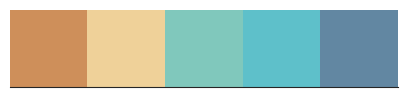

In [ ]:
#📚 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import re
import os
import string
from datetime import datetime
import matplotlib as mpl
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc
from statsmodels.tsa.stattools import adfuller

# Color palette
my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

from google.colab import drive
drive.mount('/content/drive')

# Introduction

What does a virtual coin that people like or hate, an excentric person that wants to get old on Mars and the suite of software libraries on GPUs all have in common?

Well, you know what they say ... if you want, you can find a correlation anywhere you look ... if you're really, deeply paying attention.

> **🟢 Goal**: This notebook has the purpose of analysing and predicting bitcoin price with simple linear regression stuff, as well as identifying if there is any impact from Elon Musk's tweets on the fluctuation of the bitcoin prices.

#Data Context

In [ ]:
dfbtc = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
dfelon = pd.read_csv('/content/drive/MyDrive/TweetsElonMusk.csv')

In [ ]:
dfbtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
dfelon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

In [ ]:
dfbtc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
dfelon

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,1382255613665701894,1382189497694121990,2021-04-14 11:53:14 EEST,2021-04-14,11:53:14,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'eugenelee3', 'name': 'eugene...",NaN,NaN,NaN,NaN
12558,1382239892445401089,1382189497694121990,2021-04-14 10:50:45 EEST,2021-04-14,10:50:45,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN
12559,1382239304097824768,1382189497694121990,2021-04-14 10:48:25 EEST,2021-04-14,10:48:25,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN
12560,1382131928619495429,1382046129450258434,2021-04-14 03:41:45 EEST,2021-04-14,03:41:45,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",NaN,NaN,NaN,NaN


#Data Cleaning

In [ ]:
dfbtc.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
dfbtc.dropna(inplace=True)
dfbtc.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
dfbtc.shape

(3613769, 8)

In [ ]:
dfbtc.drop_duplicates(inplace=True)
dfbtc.shape

(3613769, 8)

In [ ]:
missing_values = dfbtc.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
unique_values = dfbtc.nunique()
print("Unique Values:")
print(unique_values)

Unique Values:
Timestamp            3613769
Open                 1059732
High                 1030826
Low                  1046536
Close                1058685
Volume_(BTC)         3181865
Volume_(Currency)    3562603
Weighted_Price       3046022
dtype: int64


In [ ]:
dfbtc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


#💰Impact of Elon's Tweets on Bitcoin Prices💰
<img src="https://i.imgur.com/zK75gSX.gif">

##Elon Musk Tweets

In [ ]:
def offset_png(x, y, path, ax, zoom, offset):
    '''For adding other .png images to the graph.
    source: https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib'''

    img = plt.imread(path)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax
    x_offset = offset
    ab = AnnotationBbox(im, (x, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)



def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''

    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



def emoji_extractor(string, remove=False):
    '''Removes Emoji from a text.'''
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    if remove == False:
        # Extract emoji
        return emoji_pattern.findall(string)
    else:
        # Remove emoji from text
        return emoji_pattern.sub(r'', string)

def clean_emoji(x):
    if len(x) == 0:
        return ''
    else:
        return x[0]



def clean_tweets(df):
    '''Returns the dataframe with the tweet column cleaned.'''

    # ----- Remove \n, \t, \xa0 -----
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\xa0', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ''))

    # ----- Remove pic.twitter and http:// + https:// links -----
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'https\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'pic.twitter\S+', '', x))

    # ----- Remove mentions and hashtags -----
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'#\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'@\S+', '', x))

    # ----- Extract Emojis and Remove from Tweet -----
    df['tweet_emojis'] = df['tweet'].apply(lambda x: emoji_extractor(x, remove=False))
    df['tweet_emojis'].replace('', np.nan, inplace=True)
#     df["tweet_emojis"] = df["tweet_emojis"].apply(lambda x: clean_emoji(x))

    df['tweet'] = df['tweet'].apply(lambda x: emoji_extractor(x, remove=True))

    # ----- Strip of whitespaces -----
    df['tweet'] = df['tweet'].apply(lambda x: x.strip())
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.split()))

    # ----- Remove punctuation & Make lowercase -----
    df['tweet'] = df['tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df['tweet'] = df['tweet'].apply(lambda x: x.lower())

    return df

Tweets shape: (12562, 15) 
Bitcoin shape: (4857377, 8) 



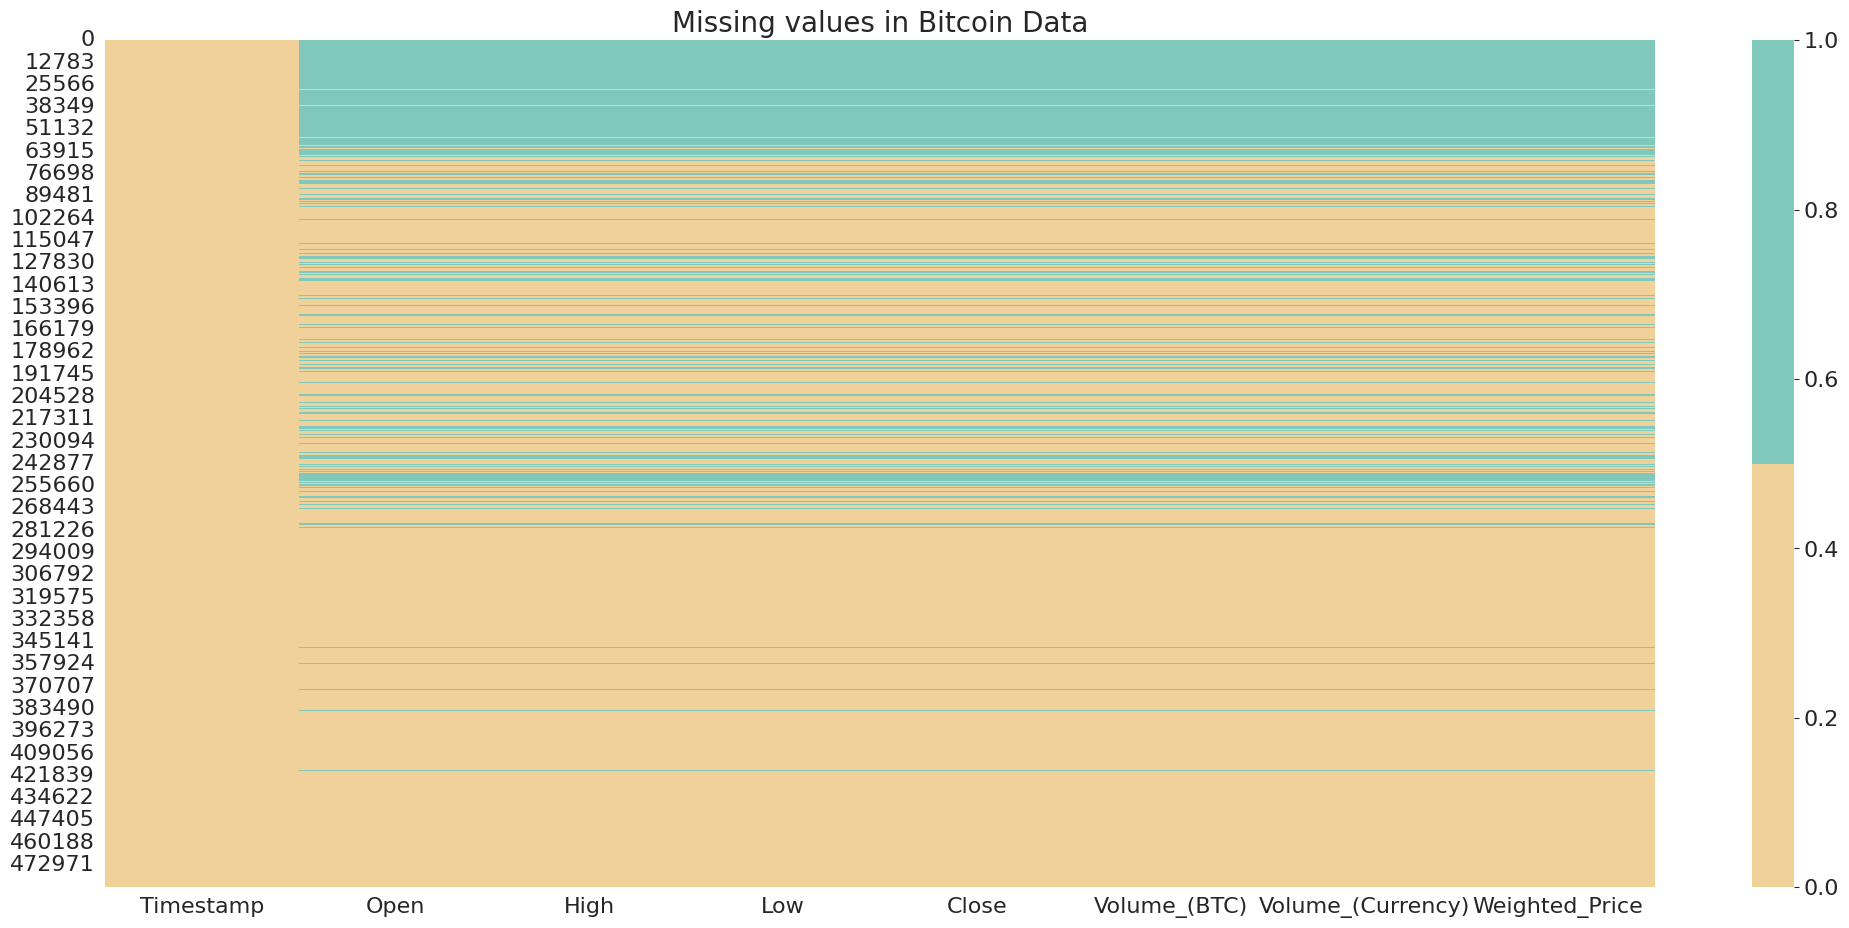

In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/TweetsElonMusk.csv")
tweets = tweets[["id", "date", "time", "username",
                 "tweet", "mentions", "urls", "photos", "replies_count",
                 "retweets_count", "likes_count", "hashtags", "link"]]

# Create new features
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])
# Clean Tweets
tweets = clean_tweets(df=tweets)

# === Bitcoin ===
bitcoin = pd.read_csv("/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")



# Prints
print(color.BOLD + "Tweets shape:" + color.END, "{}".format(tweets.shape), "\n" +
      color.BOLD + "Bitcoin shape:" + color.END, "{}".format(bitcoin.shape), "\n")
plt.figure(figsize=(25, 11))
sns.heatmap(bitcoin.isna().values[::10], cmap=[my_colors[1], my_colors[2]], xticklabels=bitcoin.columns)
plt.title("Missing values in Bitcoin Data", size=20);


# Hence, we'll drop them
bitcoin.dropna(axis=0, inplace=True)

##Tweet Count Evolution

> **📝 Note**: At the beginning of his tweeting journey, he was barely using the platform a few times in a year. 2015 was his breaking point, when he started tweeting more and more every year. It's also the year when Elon became ... well, he became **the rockstar** we know now. He was already known before, but 2015 got him on a whole new level, by announcing *Tesla's Powerwall battery* and putting out his personal life through *his biography*.

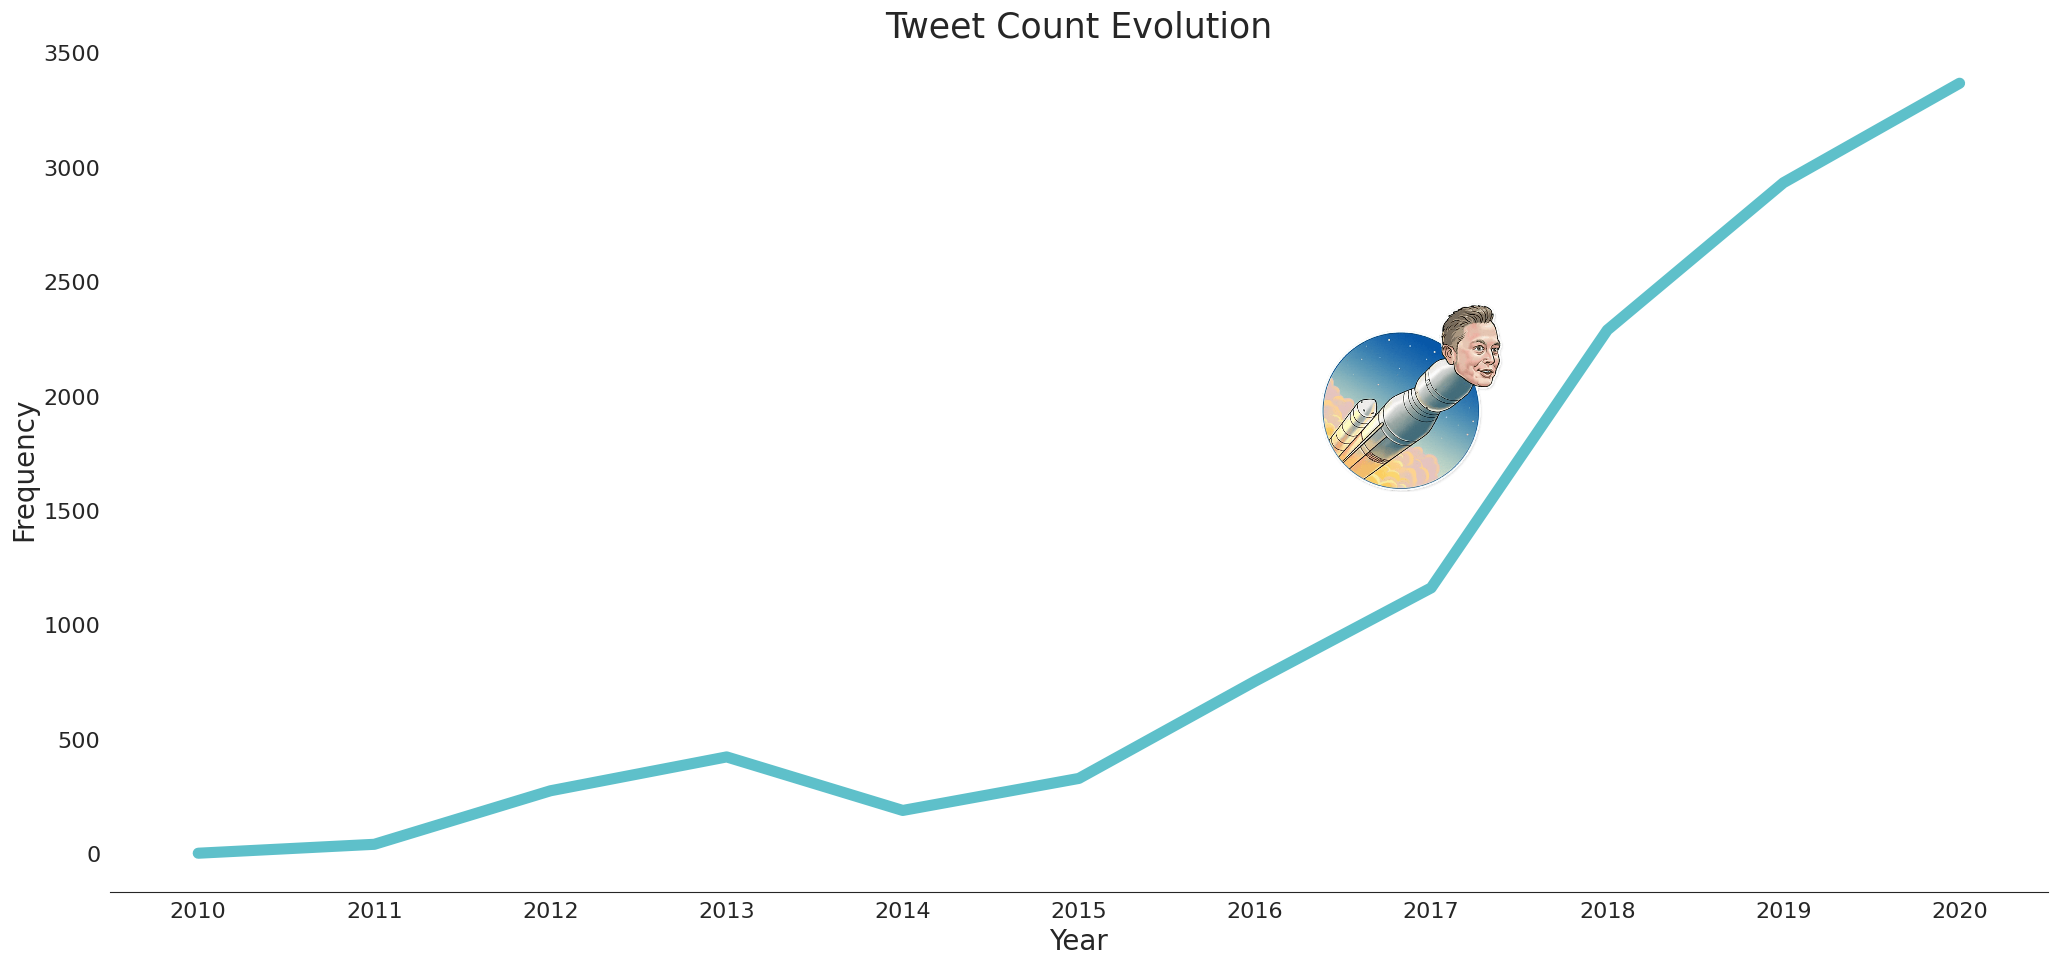

In [ ]:
# Yearly evolution
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8, color=my_colors[3])
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

# Picture
path='/content/drive/MyDrive/elon_rocket.png'
offset_png(x=6.9, y=2000, path=path, ax=ax, zoom=0.27, offset=0)

## Popularity

> **📝 Note**: It seems that his popularity grew with the number of tweets. He increased gradually in likes with the peak in 2020 (and I bet he'll continue in 2021 as well), but the replies reached a peak as well (he's communicating more with a broader audience, who's speaking back).
<center><img src="https://media.giphy.com/media/V54uolBNY5zVcsVrdc/giphy.gif?cid=790b7611f5q9t6sfxlvajued7jnpeiitzcvu10dykxkusuk4&ep=v1_gifs_search&rid=giphy.gif&ct=g" width=400></center>

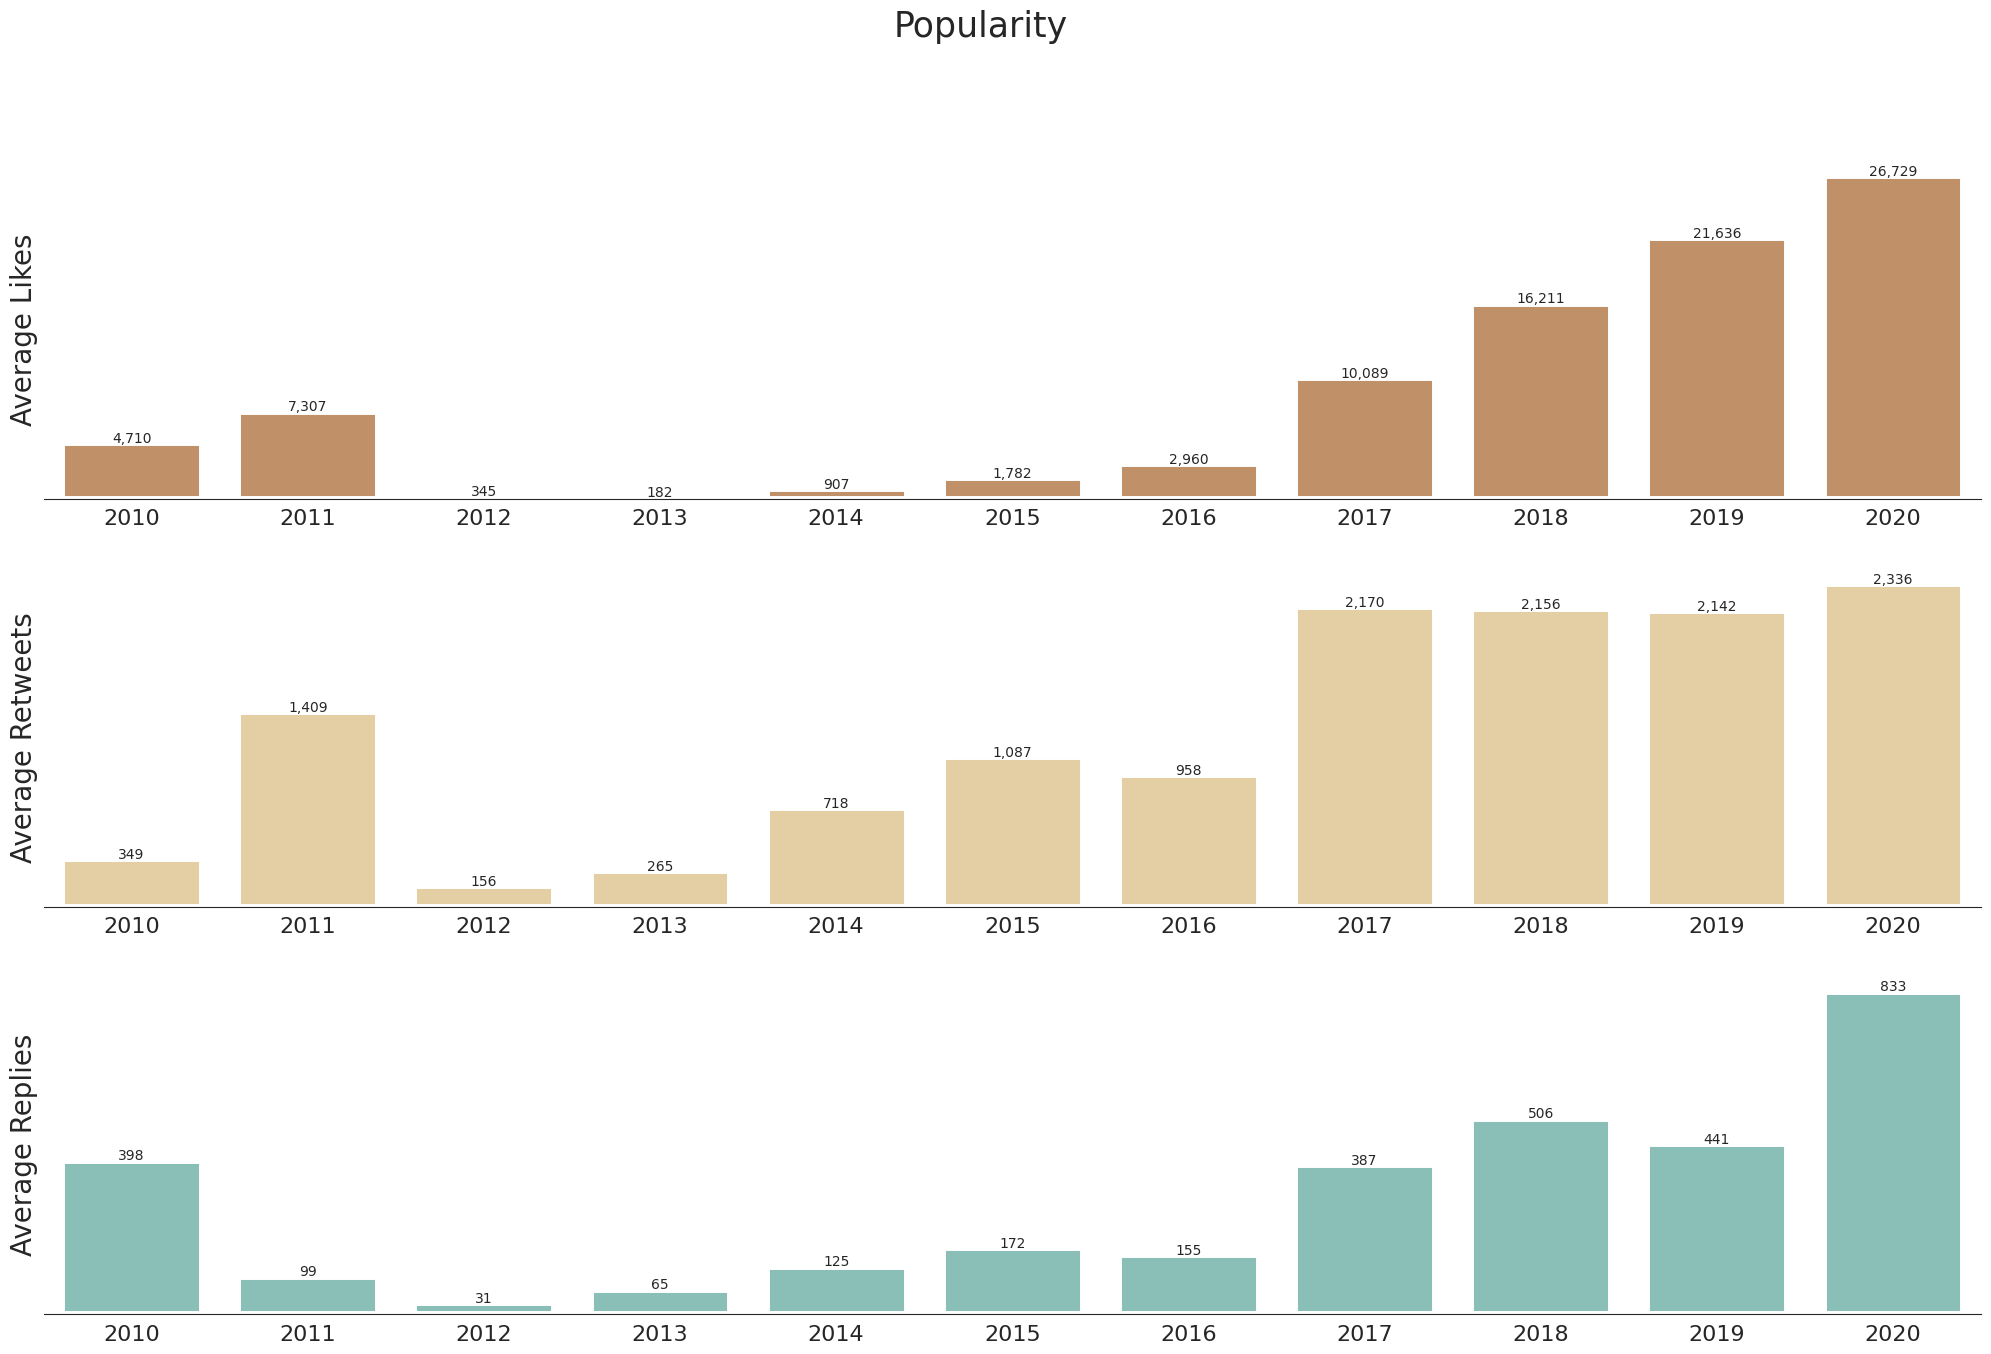

In [ ]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=5, color=my_colors[0], ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=5, color=my_colors[1], ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=5, color=my_colors[2], ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
    show_values_on_bars(axs=ax, h_v="v", space=0.4)
sns.despine(left=True);

## Most Frequent Words

> **📝 Note**:  alot of talk about **Tesla, rocket, Mars, starship, launch**. To be observed that the wording sounds super positive: yes, yeah, good, thank, people, sure. I like that a lot, he's always super positive and enthusiastin in his messages.

<center><img src="https://i.pinimg.com/originals/62/57/d3/6257d3ab7e42e96407944416ca9d3f18.gif" width = 450></center>

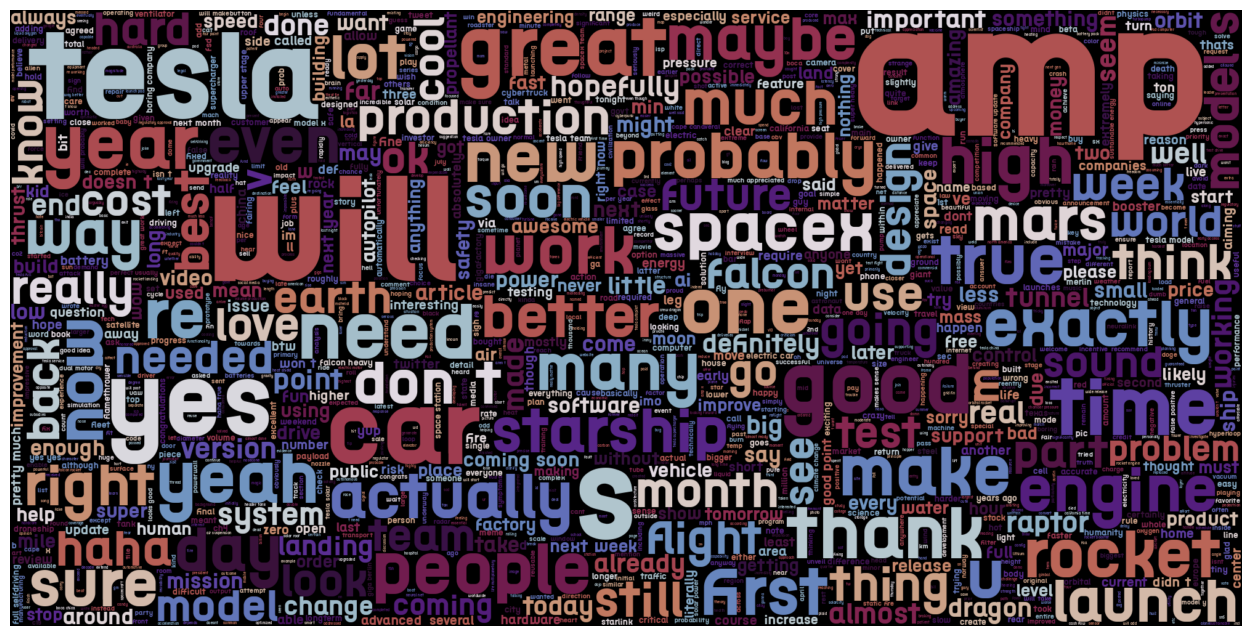

In [ ]:
all_tweets = " ".join(token for token in tweets["tweet"])
stopwords_wc = set(stopwords_wc)
font_path = "/content/drive/MyDrive/acetone_font.otf"

wordcloud = WordCloud(stopwords=stopwords_wc, font_path=font_path,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "twilight")
wordcloud.generate(all_tweets)

# Plot
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

## Is there correlation between Bitcoin and Elon Musk's Tweets?

Let's find out!

In order to do this, I've decided to look at the points in time when Elon tweeted about Bitcoin.

<center><img src="https://sm.pcmag.com/t/pcmag_uk/news/e/elon-musk-/elon-musk-tells-followers-to-use-signal-messaging-app-amid-w_p8u9.1920.jpg" width = 450></center>

## Overall View

1. pay by bitcoin capability available outside us later this year
2. tesla is using only internal amp open source software amp operates bitcoin nodes directly bitcoin paid to tesla will be retained as bitcoin not converted to fiat currency
3. you can now buy a tesla with bitcoin
4. btc bitcoin is an anagram of tbcthe boring company what a coincidence
5. to be clear i am not an investor i am an engineer i don’t even own any publicly traded stock besides tesla however when fiat currency has negative real interest only a fool wouldn’t look elsewhere bitcoin is almost as bs as fiat money the key word is “almost”
6. tesla’s action is not directly reflective of my opinion having some bitcoin which is simply a less dumb form of liquidity than cash is adventurous enough for an sampp500 company
7. bitcoin is almost as bs as fiat money
8. bitcoin is my safe word
9. toss a bitcoin to ur witcher
10. i still only own 025 bitcoins btw
11. pretty much although massive currency issuance by govt centra

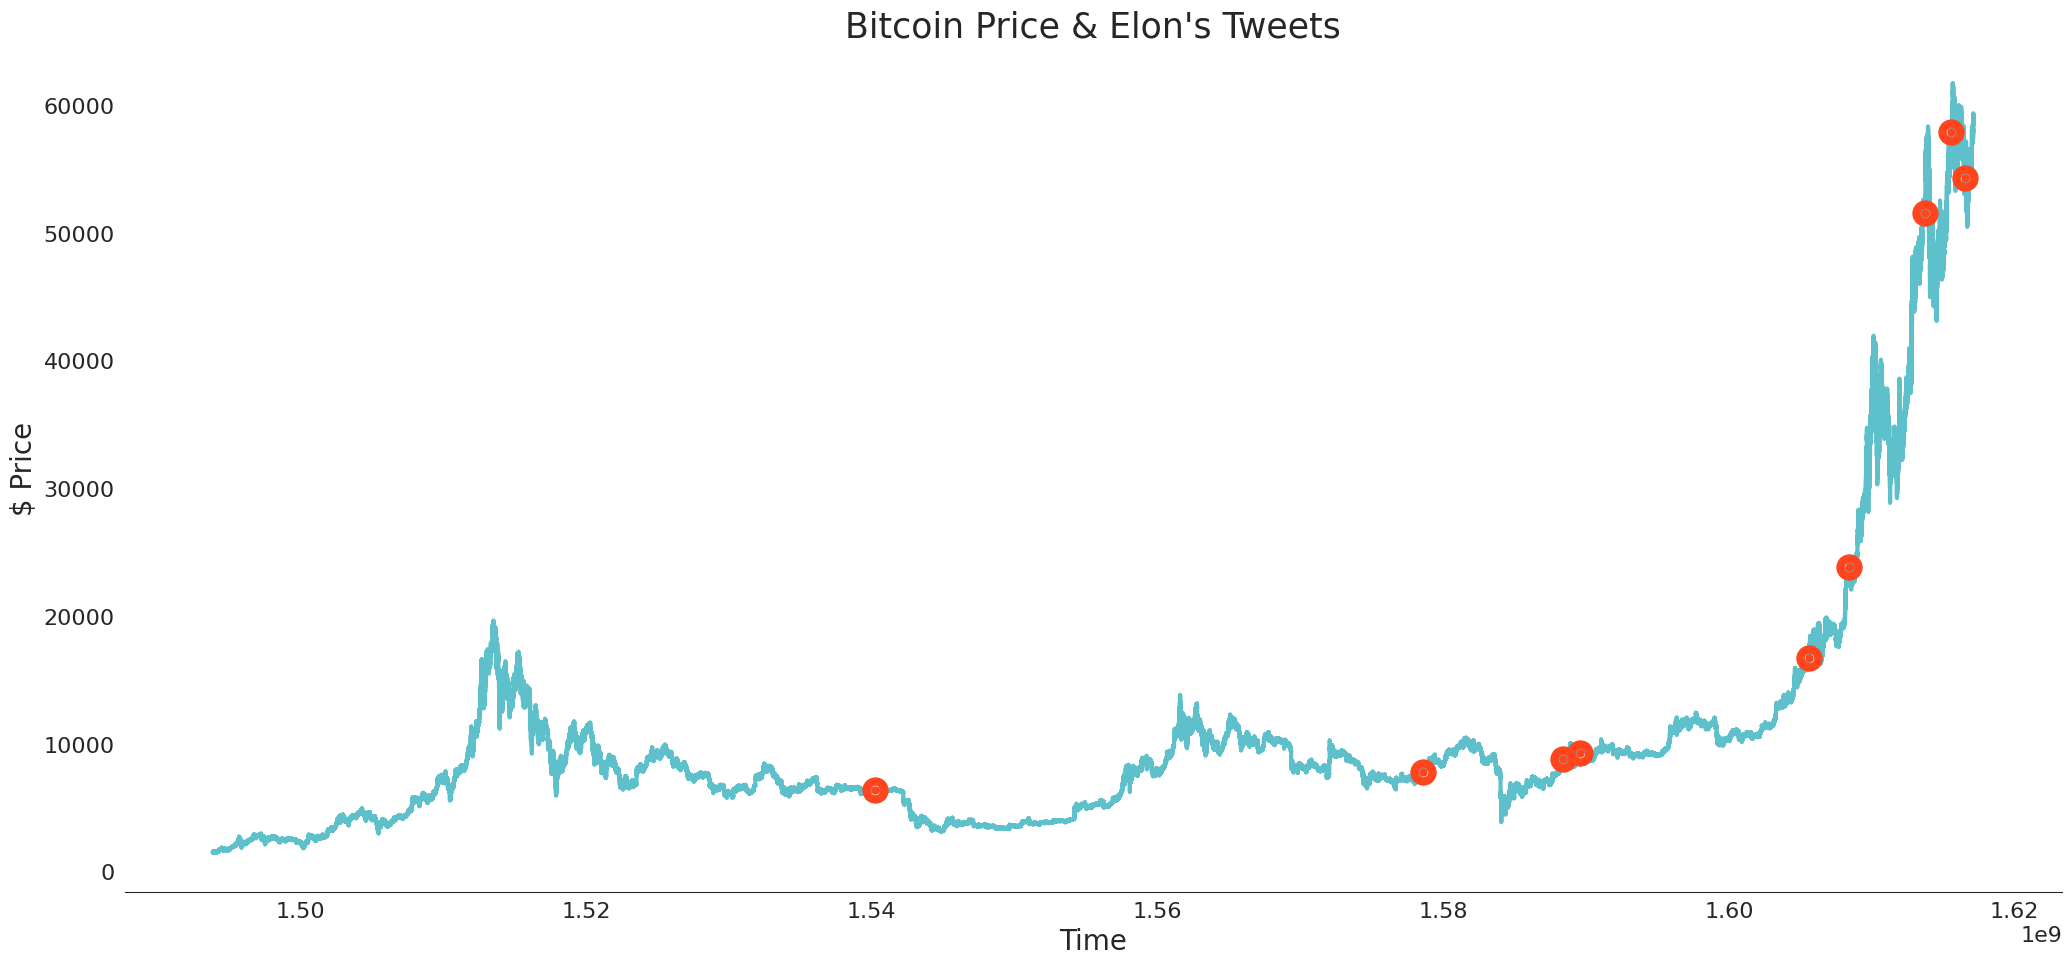

In [ ]:
# Get bitcoin info
btc_tweets = tweets[tweets["tweet"].str.contains("bitcoin")].reset_index(drop=True)
# Convert date to number
btc_tweets["date"] = btc_tweets["date"].apply(lambda x: pd.to_datetime(x).timestamp())
# Get only latest bitcoin data (as Elon never tweeted before 2018)
btc_prices = bitcoin.sort_values("Timestamp", ascending=False).head(2000000)
timestamps = btc_tweets["date"]

for k, tweet in enumerate(btc_tweets["tweet"]):
    print(color.BOLD + f"{k+1}." + color.END, tweet)

# Get intersection
x_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Timestamp"].values
y_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Weighted_Price"].values

# Plot
plt.figure(figsize=(25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)
plt.plot(btc_prices["Timestamp"], btc_prices["Weighted_Price"], color=my_colors[3], lw=3, zorder=1)
plt.title("Bitcoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()


> It doesn't really look like there is any strong correlation or that the tweets drive peaks.

### Closer Look

Let's use a magnifying glass and look closer to our points in time.

1. pay by bitcoin capability available outside us later this year
2. tesla is using only internal amp open source software amp operates bitcoin nodes directly bitcoin paid to tesla will be retained as bitcoin not converted to fiat currency
3. you can now buy a tesla with bitcoin


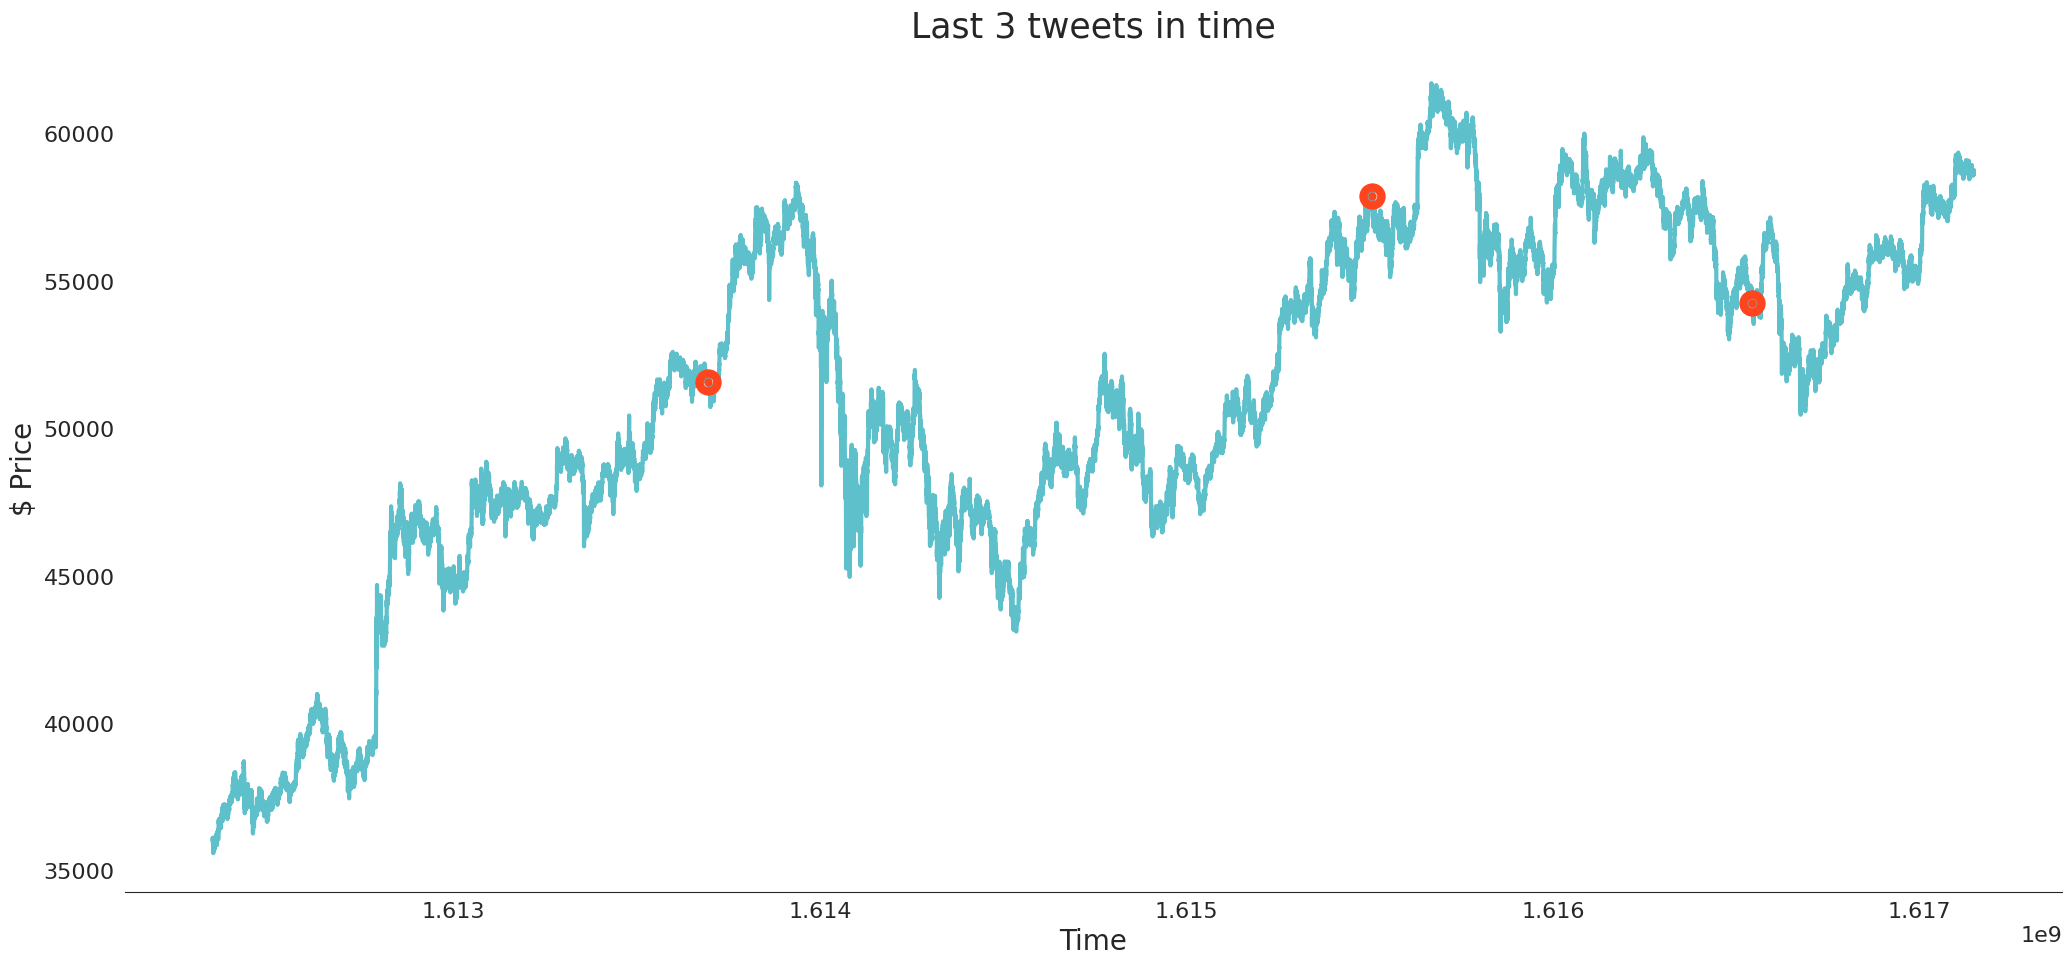

In [ ]:
# Get bitcoin info
btc_tweets = tweets[tweets["tweet"].str.contains("bitcoin")].reset_index(drop=True)
# Convert date to number
btc_tweets["date"] = btc_tweets["date"].apply(lambda x: pd.to_datetime(x).timestamp())
# Get only latest bitcoin data (as Elon never tweeted before 2018)
btc_prices = bitcoin.sort_values("Timestamp", ascending=False).head(80000)
timestamps = btc_tweets["date"]

for k, tweet in enumerate(btc_tweets["tweet"][:3]):
    print(color.BOLD + f"{k+1}." + color.END, tweet)

# Get intersection
x_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Timestamp"].values
y_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Weighted_Price"].values

# Plot
plt.figure(figsize=(25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)
plt.plot(btc_prices["Timestamp"].values, btc_prices["Weighted_Price"].values, color=my_colors[3], lw=3, zorder=1)
plt.title("Last 3 tweets in time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()


> You can observe some sudden peaks within a few days (1 do 4 days) of the making of the tweet.

#Exploratory Data Analysis

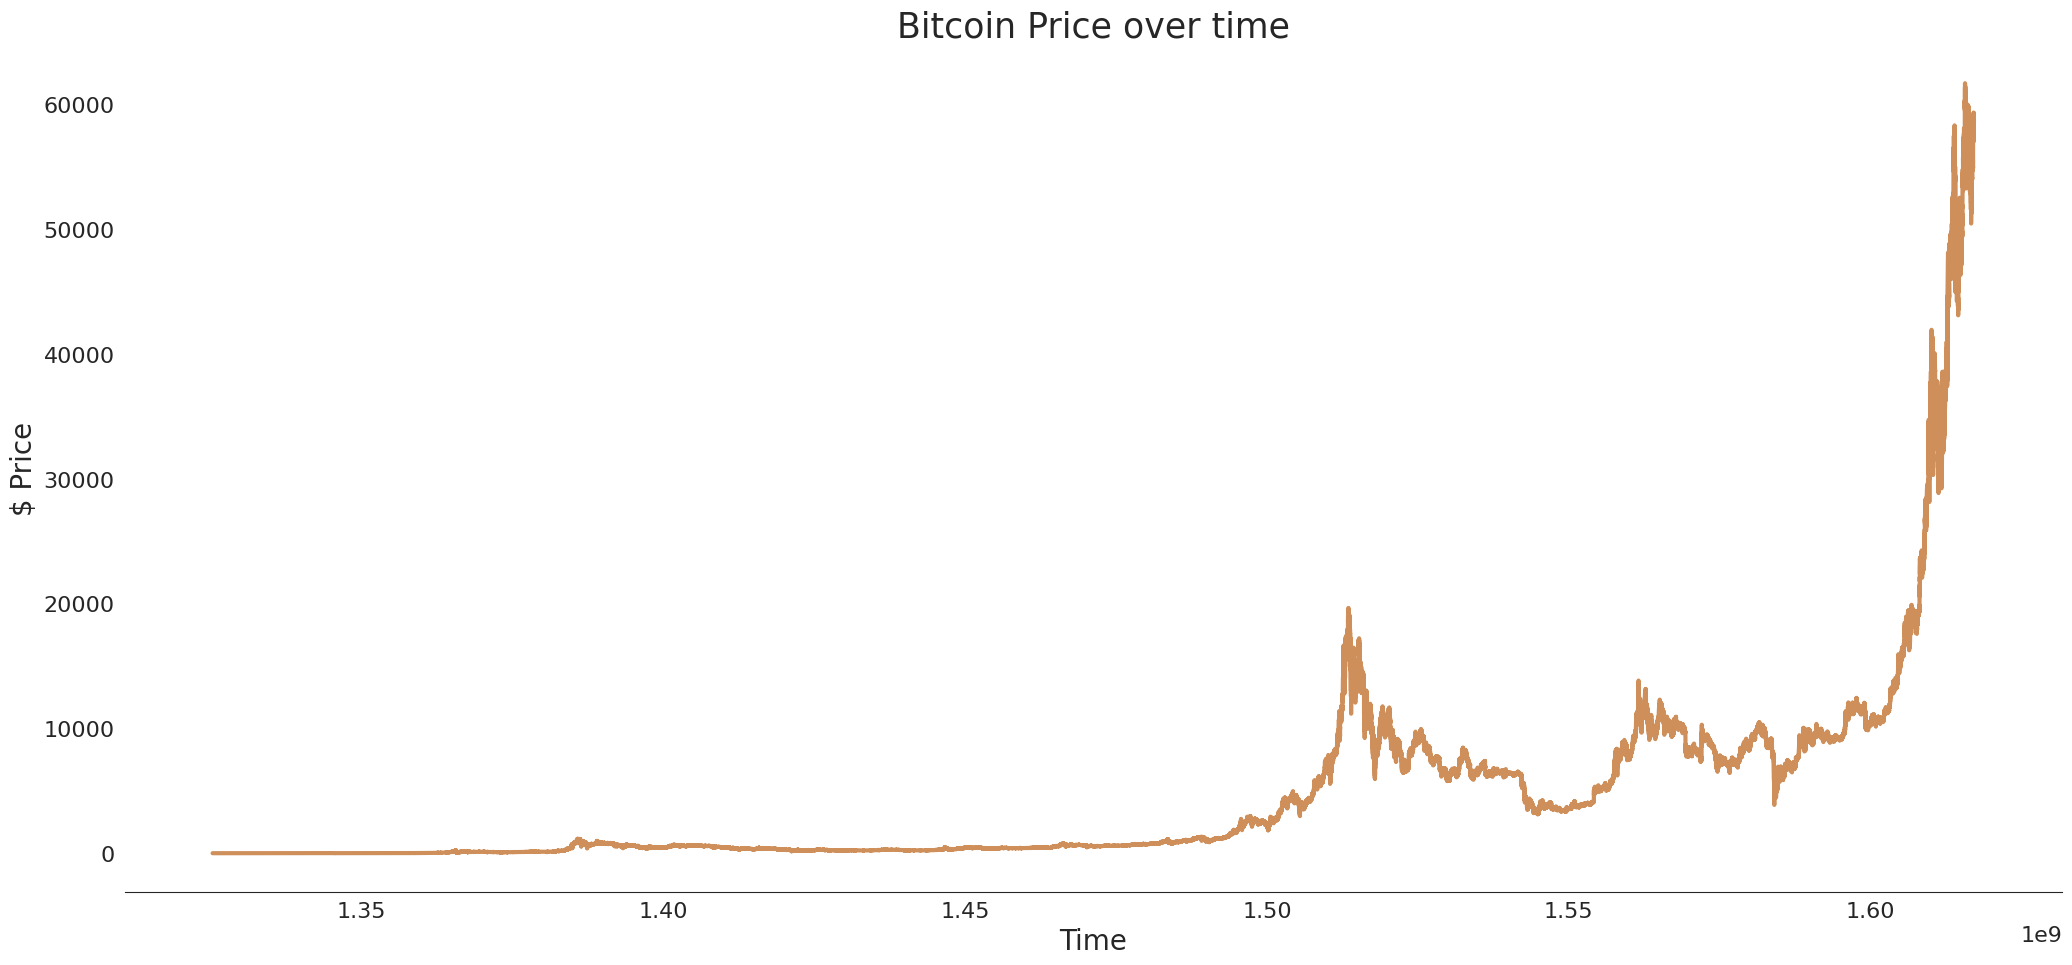

In [ ]:
plt.figure(figsize=(25, 11))
plt.plot(dfbtc["Timestamp"].values, bitcoin["Weighted_Price"].values, color=my_colors[0], lw=3)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()

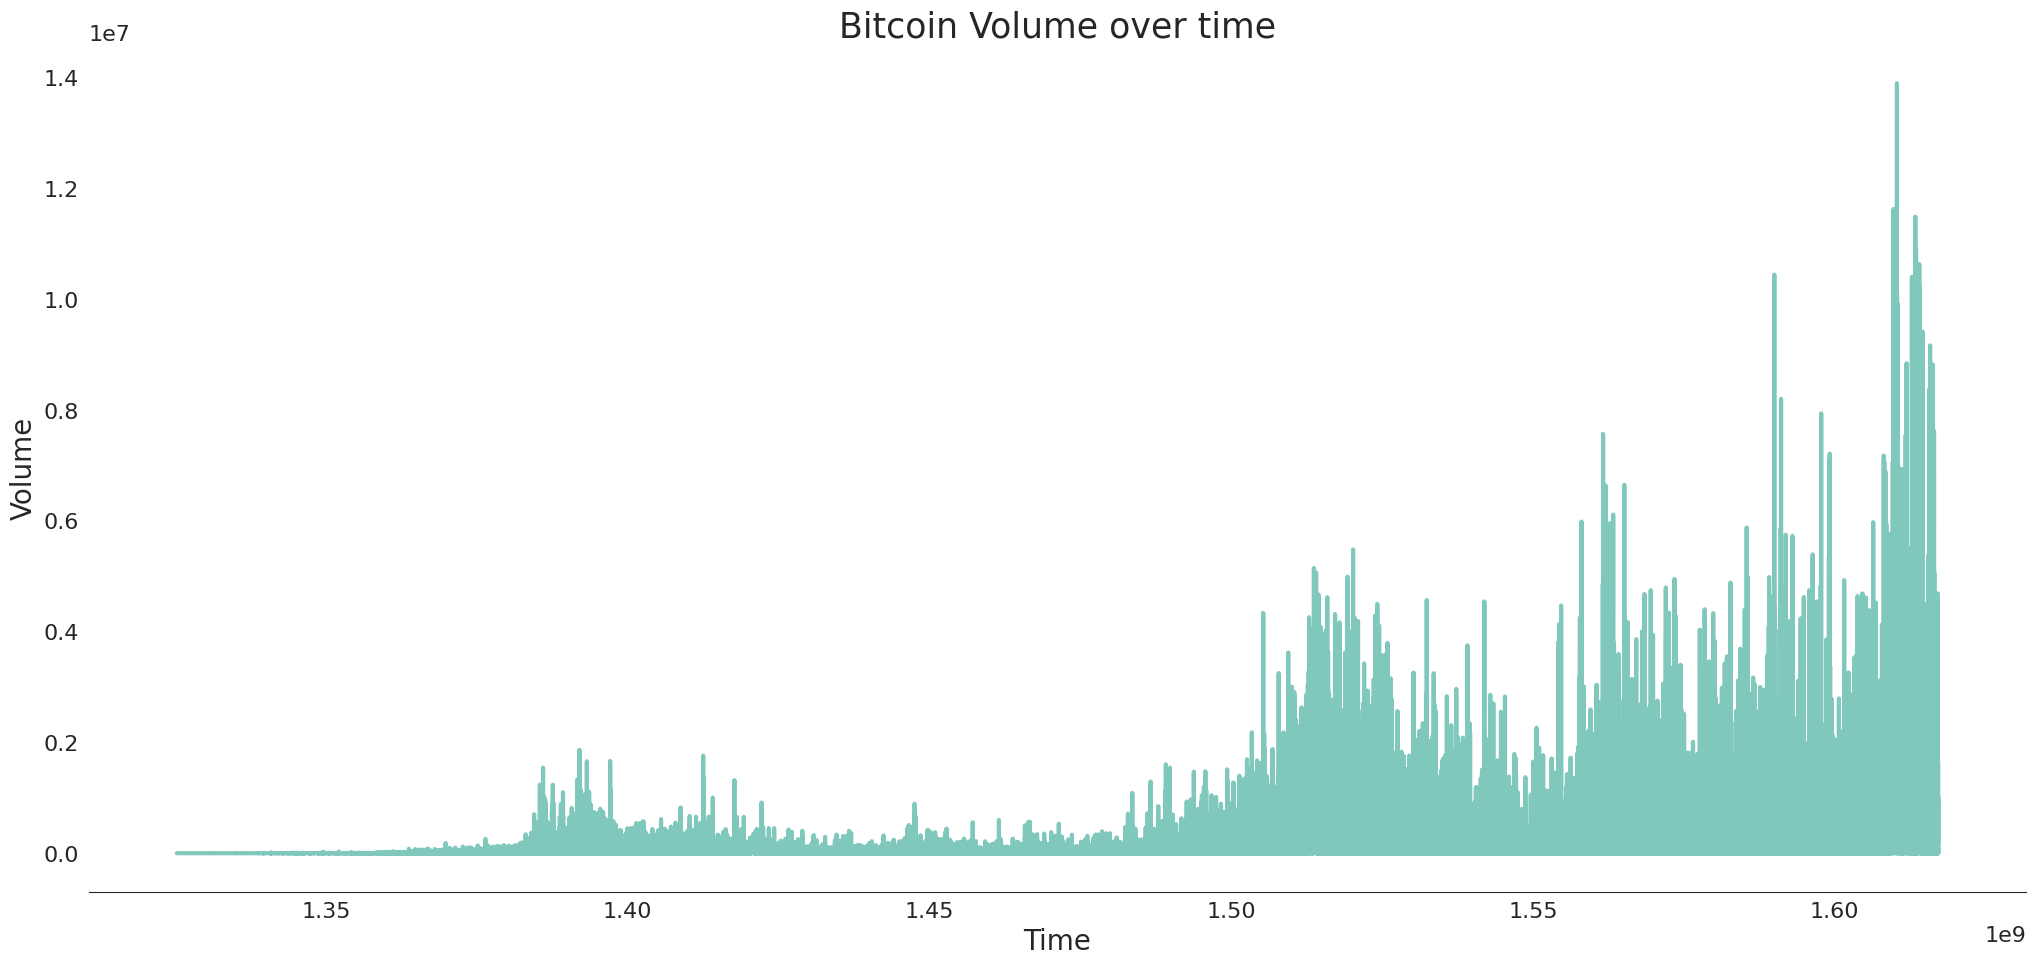

In [ ]:
plt.figure(figsize=(25, 11))
plt.plot(dfbtc["Timestamp"].values, bitcoin["Volume_(Currency)"].values, color=my_colors[2], lw=3)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20)
plt.show()

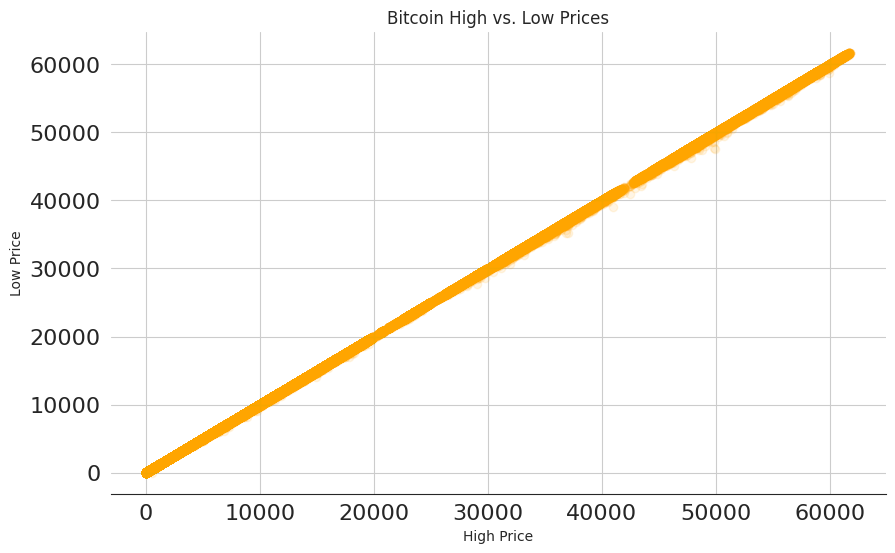

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dfbtc['High'], dfbtc['Low'], color='orange', alpha=0.1)
plt.title('Bitcoin High vs. Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

In [ ]:
print(dfbtc.describe())

          Timestamp          Open          High           Low         Close  \
count  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06   
mean   1.497898e+09  6.009024e+03  6.013357e+03  6.004488e+03  6.009014e+03   
std    7.443689e+07  8.996247e+03  9.003521e+03  8.988778e+03  8.996360e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.433683e+09  4.438600e+02  4.440000e+02  4.435200e+02  4.438600e+02   
50%    1.505880e+09  3.596970e+03  3.598190e+03  3.595620e+03  3.597000e+03   
75%    1.562208e+09  8.627270e+03  8.632980e+03  8.621090e+03  8.627160e+03   
max    1.617149e+09  6.176356e+04  6.178183e+04  6.167355e+04  6.178180e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.613769e+06       3.613769e+06    3.613769e+06  
mean   9.323249e+00       4.176284e+04    6.008935e+03  
std    3.054989e+01       1.518248e+05    8.995992e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%

In [ ]:
correlation_matrix = dfbtc.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Timestamp      Open      High       Low     Close  \
Timestamp           1.000000  0.650719  0.650644  0.650803  0.650714   
Open                0.650719  1.000000  0.999999  0.999999  0.999999   
High                0.650644  0.999999  1.000000  0.999998  0.999999   
Low                 0.650803  0.999999  0.999998  1.000000  0.999999   
Close               0.650714  0.999999  0.999999  0.999999  1.000000   
Volume_(BTC)       -0.103926 -0.051860 -0.051717 -0.052040 -0.051877   
Volume_(Currency)   0.228190  0.344074  0.344498  0.343541  0.344036   
Weighted_Price      0.650737  0.999999  0.999999  1.000000  1.000000   

                   Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp             -0.103926           0.228190        0.650737  
Open                  -0.051860           0.344074        0.999999  
High                  -0.051717           0.344498        0.999999  
Low                   -0.052040           0.343541     

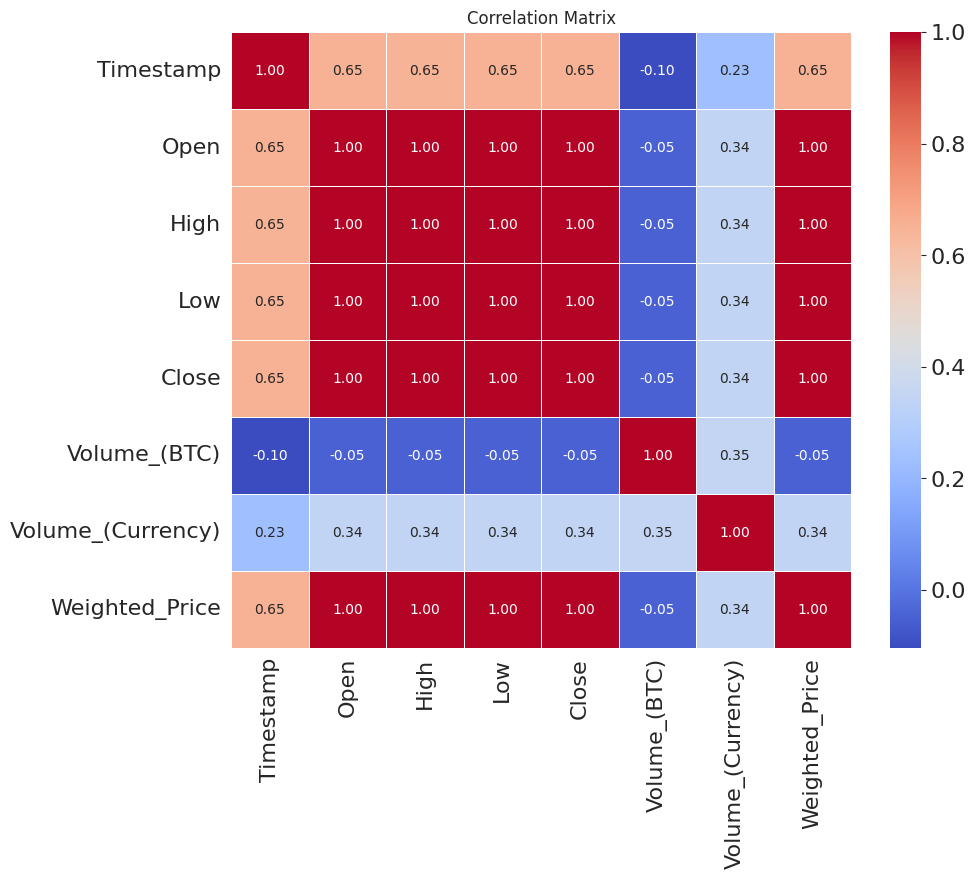

In [ ]:
correlation_matrix = dfbtc.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Testing Stationarity

Our time series data **can have a trend or not**. It is of the utmost importance to determine how the series is behaving before applying any model to it.

> **Augmented Dicky Fuller test**: it determines how strongly a time series is defined by a trend.

**Hypothesis**:
1. Null Hypothesis (H0): Null hypothesis of the test is that the time series can be represented by a unit root that **is not stationary**.
2. Alternative Hypothesis (H1): Alternative Hypothesis of the test is that the time series **is stationary**.

### Why is Stationarity Important?
For data to be stationary, the statistical properties of a system **do not change over time**. This does not mean that the values for each data point have to be the same, but the overall behavior of the data should remain constant.

If the data is non-stationary (meaning it has a trend), we need to **remove** it in order to proceed with the analysis.

*Reference: [Bitcoin Price Prediction](https://towardsdatascience.com/bitcoin-price-prediction-using-time-series-forecasting-9f468f7174d3)*

ADF Statistic: 4.695348
p-value: 1.000000
The graph is non-stationary! (it has a trend)
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


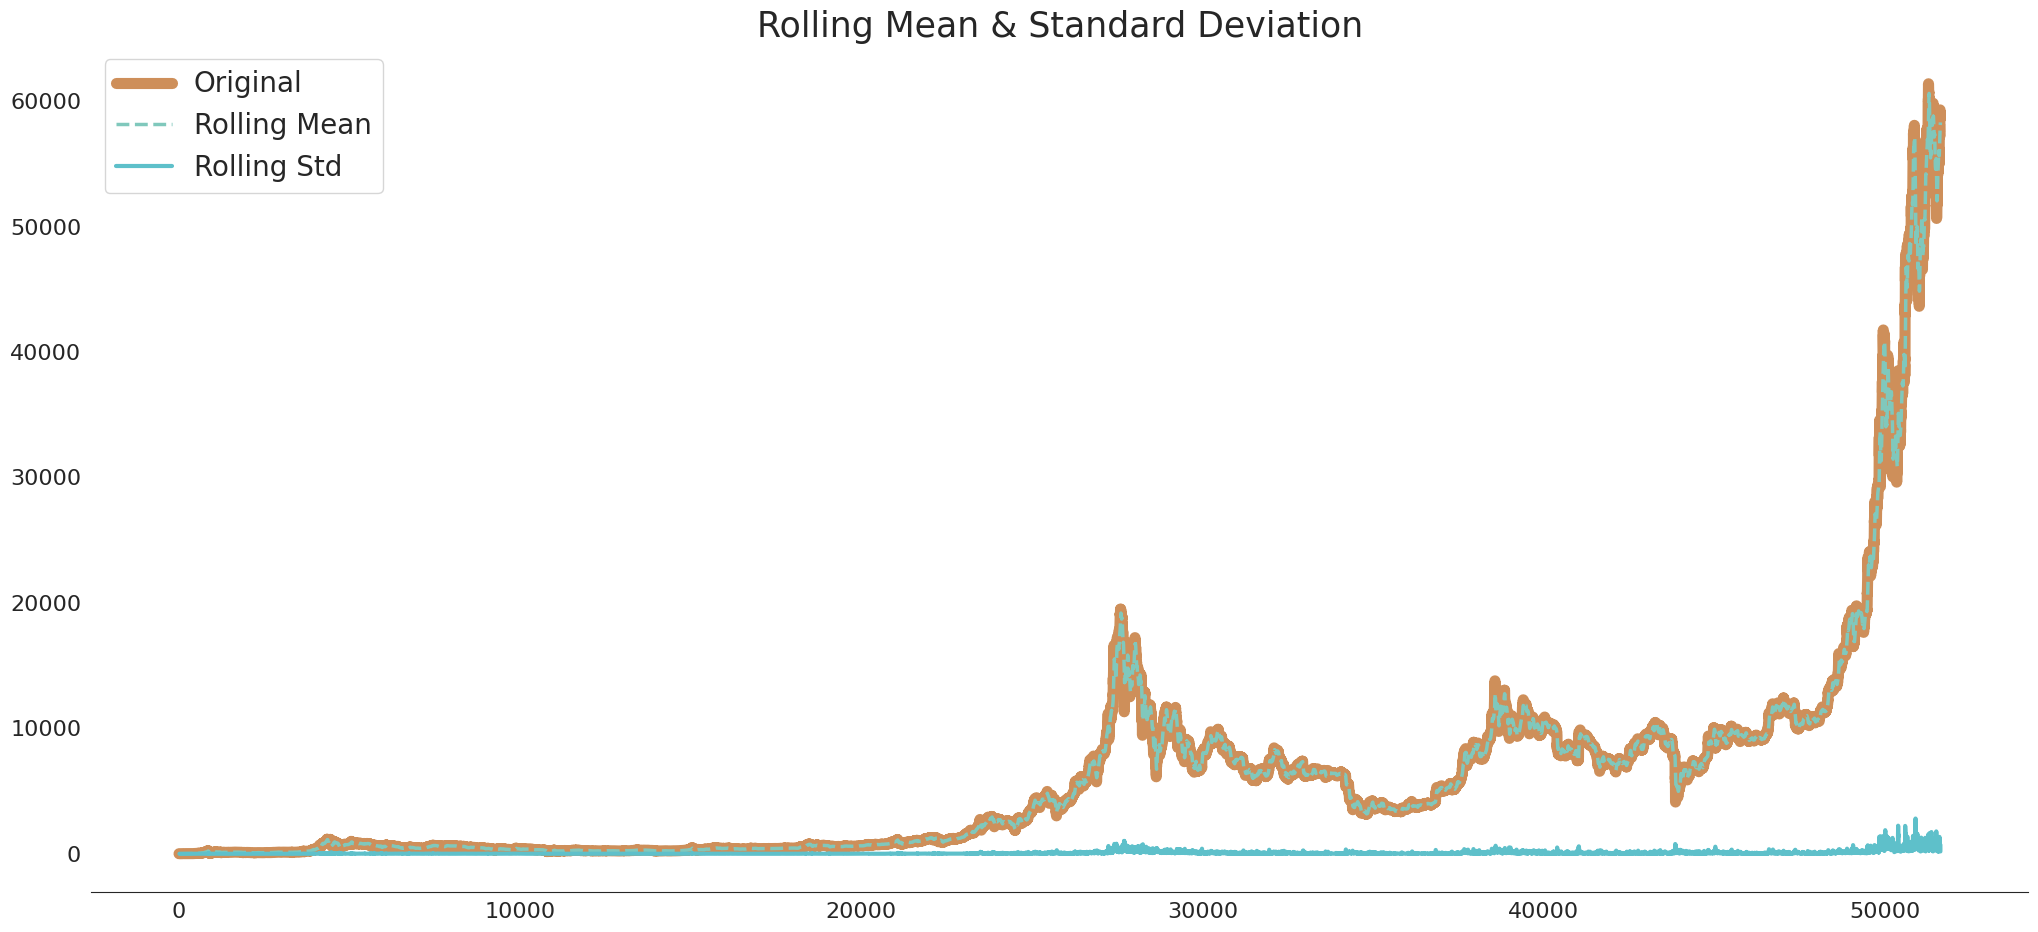

In [ ]:
def test_stationarity(x, log="non-stationary"):
    '''Test stationarity of a Time Series variable.'''

    # Perform Dickey Fuller test
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    pvalue = result[1]

    for key, value in result[4].items():
        if result[0] > value:
            print("The graph is non-stationary! (it has a trend)")
            break
        else:
            print("The graph is stationary! (it doesn't have a trend)")
            break

    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

    # Determing rolling statistics
    rolmean = x.rolling(window=22, center=False).mean()
    rolstd = x.rolling(window=12, center=False).std()

    # Plot rolling statistics:
    plt.figure(figsize=(25, 11))
    orig = plt.plot(x, color=my_colors[0], lw=8, label='Original')
    mean = plt.plot(rolmean, color=my_colors[2], lw=2.5, ls="--", label='Rolling Mean')
    std = plt.plot(rolstd, color=my_colors[3], lw=3, label='Rolling Std')
    plt.legend(loc='best', fontsize=20)
    plt.title('Rolling Mean & Standard Deviation', size=25)
    plt.show(block=False)


# Define the price Series
price = pd.Series(bitcoin["Weighted_Price"][::70].values)

# Perform the test for stationarity
test_stationarity(price)

And surprise surprise! The series has a trend (is non stationary). We could have noticed that by only using our naked eye, but we always need to double check.

## From non-stationarity to stationarity
Now that we now our series has a trend, we need to remove it in order to proceed with the models.

We can do that by applying a **natural log** to our series. Let's see how that's done!

ADF Statistic: -3.434271
p-value: 0.009845
The graph is stationary! (it doesn't have a trend)
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


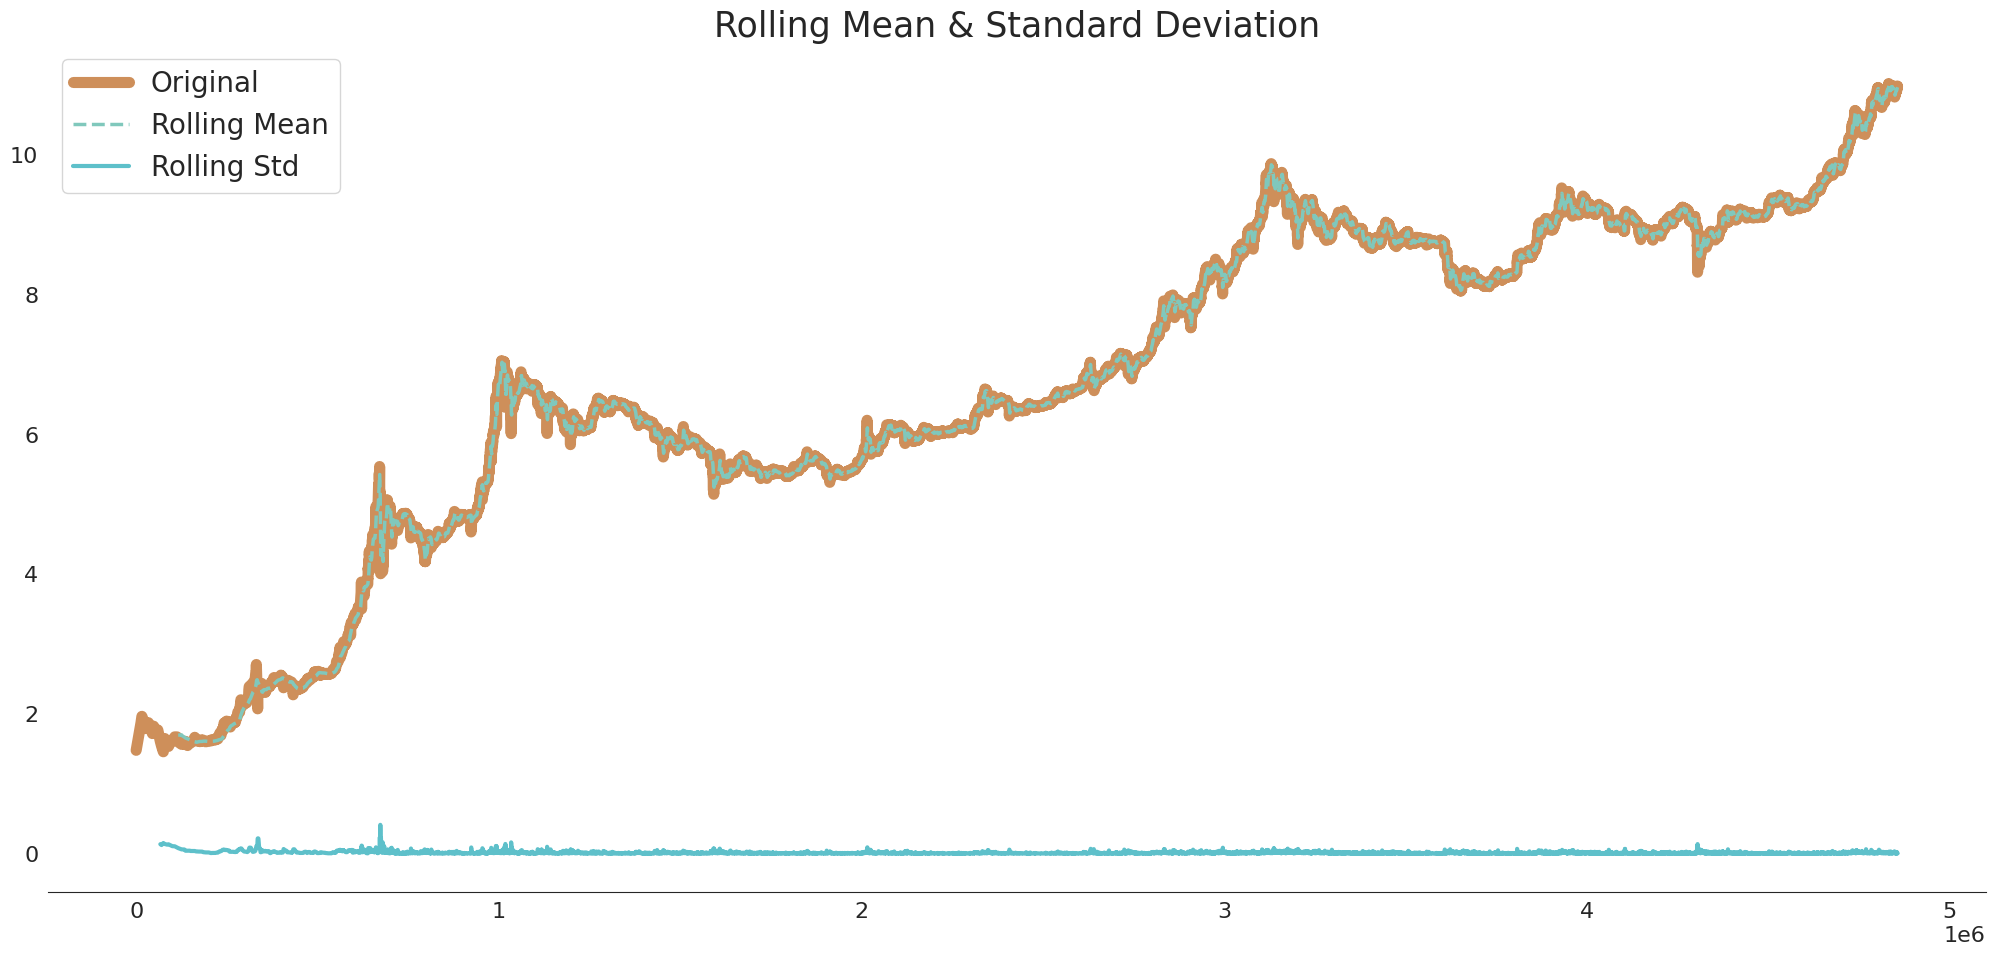

In [ ]:
# Adjust by applying natural log over the series
adjusted_price = np.log(bitcoin["Weighted_Price"])

price_adjusted = pd.Series(adjusted_price[::70])
test_stationarity(price_adjusted, log="stationary")


In [ ]:
# Save the price with no trend into a new variable
bitcoin["log_price"] = adjusted_price

#Data Preprocessing & Feature Engineering

In [ ]:
# Defining our scope

features = ["Open", "Low", "Volume_BTC", "Volume_USD"]
target = "High"

# Renaming for ease

dfbtc.rename(columns = {'Volume_(Currency)':'Volume_USD', 'Volume_(BTC)':'Volume_BTC'}, inplace = True)

# Reduce df to scope

dfbtcmodel = dfbtc[features + [target]]

In [ ]:
dfbtcmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3613769 entries, 0 to 4857376
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Open        float64
 1   Low         float64
 2   Volume_BTC  float64
 3   Volume_USD  float64
 4   High        float64
dtypes: float64(5)
memory usage: 165.4 MB


In [ ]:
fcols = dfbtcmodel.select_dtypes('float').columns
icols = dfbtcmodel.select_dtypes('integer').columns

dfbtcmodel.loc[:, fcols] = dfbtcmodel[fcols].apply(pd.to_numeric, downcast='float')
dfbtcmodel.loc[:, icols] = dfbtcmodel[icols].apply(pd.to_numeric, downcast='integer')

In [ ]:
dfbtcmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3613769 entries, 0 to 4857376
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Open        float64
 1   Low         float64
 2   Volume_BTC  float64
 3   Volume_USD  float64
 4   High        float64
dtypes: float64(5)
memory usage: 165.4 MB


#Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfbtcmodel[features], dfbtcmodel[target], test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)  # Get predictions

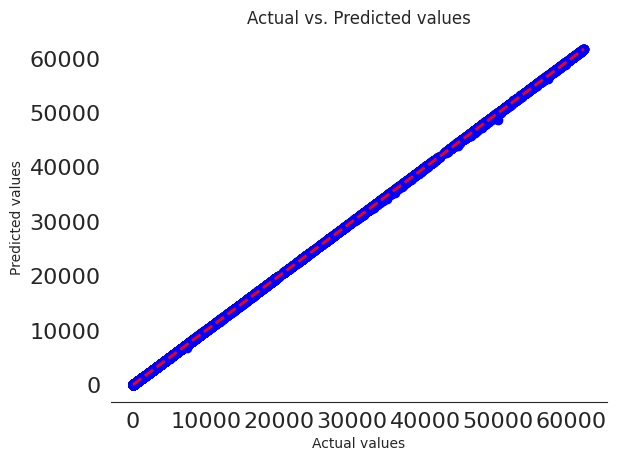

In [ ]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

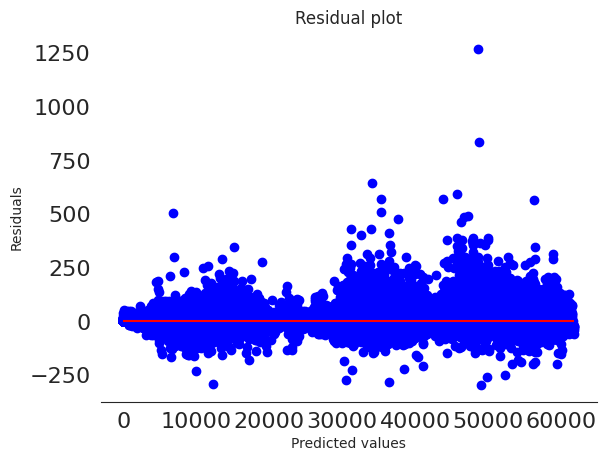

In [ ]:
y_prediction = model.predict(x_test)
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals, color='blue')
plt.hlines(y=0, xmin=0, xmax=max(y_prediction), color='red')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()